In [135]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import scipy.integrate
import scipy
import scipy.optimize
from scipy import fft
from matplotlib import cm

import pandas as pd
#from sklearn.linear_model import LinearRegression

20
501


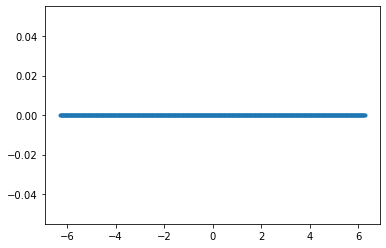

In [275]:
N = 500;  M = N + 1
L = 2*np.pi*2
Delta = L/(N+1)
z = np.linspace(-L/2, L/2-Delta, N)
print(len(collocation_points))
print(M)
epsilon = 0.3; D = - 0.5; 
alpha = 0.9; 
#epsilon = 0.1; D = 0.6; alpha = 0.8; 
Ma = (1-D)/2
Lambda=1
plt.plot(z,np.zeros_like(z), '.')
Q = 10

In [276]:
def f_solitary_wave(vec):
    f = vec[:-1]; c=vec[-1]
    N = len(f)
    n = np.arange(N);
    n[int(N/2)+1:] -= N
    
    equations = np.zeros_like(vec)
    f_z = fft.ifft(n*1j*np.pi*2/L*fft.fft(f))
    f_zzz = fft.ifft((n*1j*np.pi*2/L)**3*fft.fft(f))
    #equations[:-1] = -c/f**2+(1+(1-2*Ma)*f_z+epsilon**2*f_zzz).real/3-Q/f**3
    equations[:-1] = -c*f + (1+(1-2*Ma)*f_z+epsilon**2*f_zzz).real/3*f**3-Q
    equations[-1] = np.trapz(f, z) - L*(1-alpha)*Lambda
    #plt.plot(collocation_points, eta)
    
    #equations = -c/eta**2 + 1/3*(1+D*eta_z+epsilon**2*eta_zzz)-K/eta**3
    #print((equations**2).mean())
    return equations
def f_solitary_wave_ord4(vec):
    f = vec[:-1]; c=vec[-1]
    N = len(f)
    n = np.arange(N);
    n[int(N/2)+1:] -= N
    
    equations = np.zeros_like(vec)
    f_z = fft.ifft(n*1j*np.pi*2/L*fft.fft(f))
    f_zzz = fft.ifft((n*1j*np.pi*2/L)**3*fft.fft(f))
    #equations[:-1] = -c/f**2+(1+(1-2*Ma)*f_z+epsilon**2*f_zzz).real/3-Q/f**3
    equations[:-1] = -c*f_z.real + fft.ifft(n*1j*np.pi*2/L*fft.fft(f**3*(1+(1-2*Ma)*f_z+epsilon**2*f_zzz))).real/3
    equations[-1] = np.trapz(f, z) - L*(1-alpha)*Lambda
    #plt.plot(collocation_points, eta)
    
    #equations = -c/eta**2 + 1/3*(1+D*eta_z+epsilon**2*eta_zzz)-K/eta**3
    #print((equations**2).mean())
    return equations

In [277]:
k = 1/2
u0 = (1 + np.cos(z*k)*0.5)*(1-alpha)*Lambda
c0 = np.asarray([1])
vec_guess = np.concatenate([u0,c0])
#vec_guess#

In [282]:
#sol = scipy.optimize.root(f_solitary_wave,  vec_guess, method='hybr')
sol = scipy.optimize.root(f_solitary_wave_ord4,  vec_guess, method='lm', tol=1e-9)
vec_sol = sol.x
print(sol.success)


True


0.010040040494203732
0.003333333333333332
1.2566370614358975
1.256637061435917


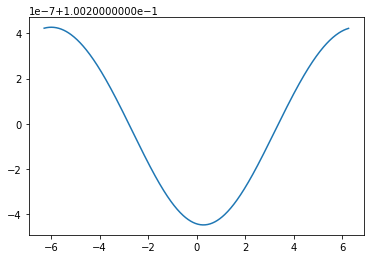

In [283]:
f = vec_sol[:-1]; c= vec_sol[-1]
print(c)
print((1-alpha)**2/3*Lambda**2)
plt.plot(z, f)
#plt.plot(z, u0)
print(np.trapz(f,z))
print(L*(1-alpha)*Lambda)

In [234]:
# try Krylov
# compute the Jacobian
# try very nearly linear wave

0.010080060773231956
0.003333333333333332
1.2566370614409739
1.256637061435917


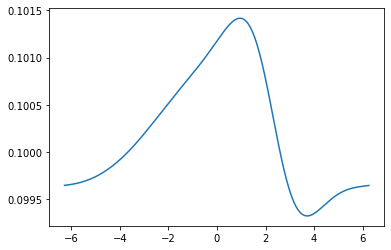

In [264]:
f = vec_sol[:-1]; c= vec_sol[-1]
print(c)
print((1-alpha)**2/3*Lambda**2)
plt.plot(z, f)
#plt.plot(z, u0)
print(np.trapz(f,z))
print(L*(1-alpha)*Lambda)